### Entscheidungsbäume (Decision Trees)


<img src='https://help.sap.com/doc/7b783465728810148a4b1a83b0e91070/1511%20002/de-DE/loiod486240f89a849a2bf9ed8622553b6a9_LowRes.png' width='300px;'/>

Ein Entscheidungsbaum (engl. decision tree) besteht aus einer verzweigten Abfolge
von Fallentscheidungen, die verschiedene Kategorien voneinander abgrenzen. Während des Trainings werden die Trainingsdaten nach abgrenzenden Merkmalen
durchsucht. Der Hauptunterschied zur logistischen Regression ist, dass die Abgrenzungen zwischen den Daten der verschiedenen Kategorien nicht durch Geraden
beschreibbar, also nicht linear sein müssen.  

Jede Verzweigung verfügt über einen berechneten Schwellenwert zwischen 0 und 1,
der nach dem italienischen Soziologen und Statistiker Corrado Gini als Gini-Index bezeichnet wird. (Der ursprüngliche Gini-Index oder auch Gini-Koeffizient beschreibt
die Ungleichverteilung von Einkommen in Volkswirtschaften.) Bei der Anwendung
im Entscheidungsbaum gilt: Je niedriger der Gini-Index ist, desto exakter lassen sich
die verschiedenen Kategorien voneinander unterscheiden.  

Es wird so lange weiterverzweigt, bis jedes Blatt des Baums einen Gini-Index von 0
aufweist (oder bis eine vorher festgelegte maximale Verzweigungstiefe erreicht ist).
Da solche Blätter jedoch in ungünstigen Fällen nur noch einen Datensatz beinhalten,
kann es sein, dass bereits vorher falsch »abgebogen« wurde und dass es so zu Fehlkategorisierungen kommt.  

Im Folgenden ein Beispiel mit der scikit-learn-Klasse `DecisionTreeClassifier`:

In [31]:
# Module importieren
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
%matplotlib inline
import numpy as np


In [32]:
# Iris-Datenmenge laden
X, y = load_iris(return_X_y=True)

In [33]:
# In Trainings- und Testdaten unterteilen, dabei mischen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [34]:
# ein Modell erstellen
clf = DecisionTreeClassifier()

In [35]:
# Modell trainieren
clf = clf.fit(X_train, y_train)

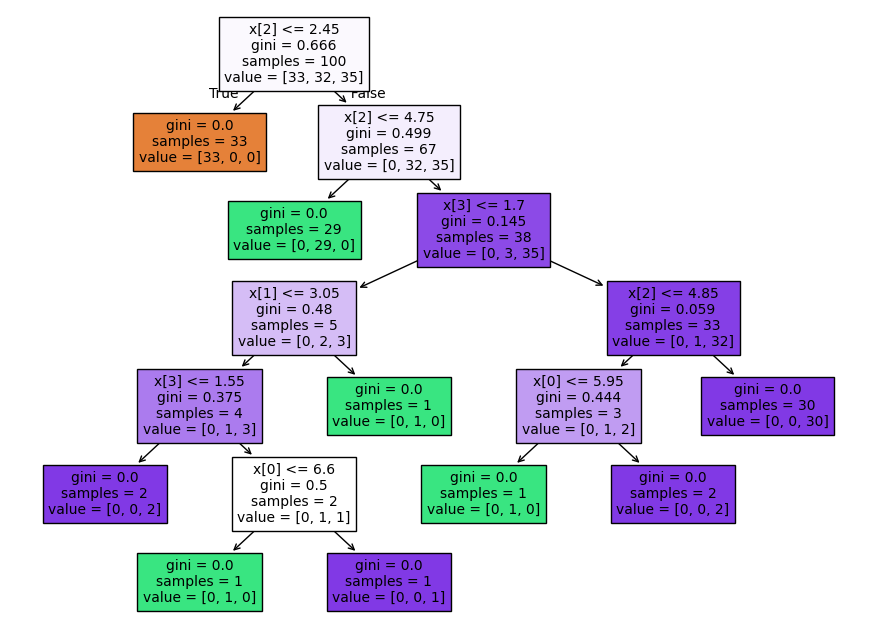

In [36]:
# grafische Darstellung des Modells
plt.figure(figsize=(11, 8))
plot_tree(clf, filled=True, fontsize=10);

Das Laden und Aufteilen der Daten sowie das Training mithilfe der Methode `fit()`
funktionieren genauso wie bei der logistischen Regression.
Die Option figsize der pyplot-Funktion `figure()` konfiguriert die Größe (Breite,
Höhe) der Zeichenfläche in Zoll, und fontsize in der Methode `plot_tree()` stellt die
Schriftgröße ein. 

Nach dem Training können wir wie gehabt mit den Testdaten überprüfen, wie gut die
Klassifizierung funktioniert hat:

In [37]:
# Genauigkeit des Modells ermitteln
accuracy = clf.score(X_test, y_test)
print(f"Genauigkeit: {accuracy}")

Genauigkeit: 0.92


**Achtung**: es gibt auch eine Entscheidungsbaum-Klasse zur Lösung von Regressionsproblemen: `DecisionTreeRegressor`. Das ist bei vielen scikit-learn-Klassen analog der Fall.

In [8]:
# Recherchiere ein Beispiel für DecisionTreeRegressor
#

In [25]:
'''np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])'''

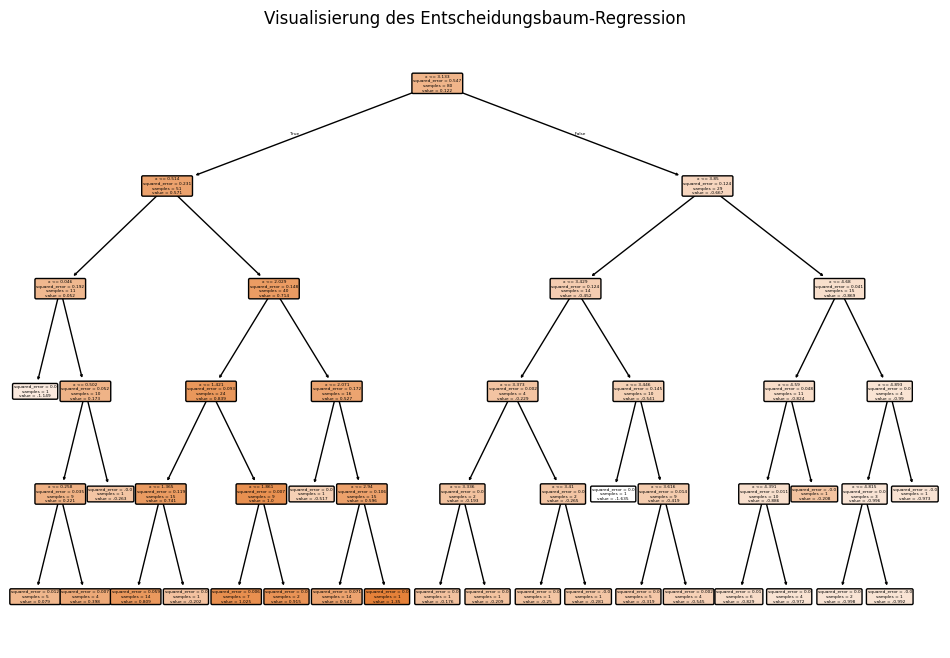

In [ ]:
rng = np.random.RandomState(1)
X_reg = np.sort(5 * rng.rand(80, 1), axis=0)  # zufällige Features
y_reg = np.sin(X_reg).ravel()  # Zielwerte mit Sinusfunktion
y_reg[::5] += 3 * (0.5 - rng.rand(16))  # Rauschen hinzufügen

# Modell erstellen und trainieren
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_reg, y_reg)

# Entscheidungsbaum anzeigen
plt.figure(figsize=(12, 8))
plot_tree(tree_reg, feature_names=['x'], filled=True, rounded=True)
plt.title("Visualisierung des Entscheidungsbaum-Regression")
plt.show()



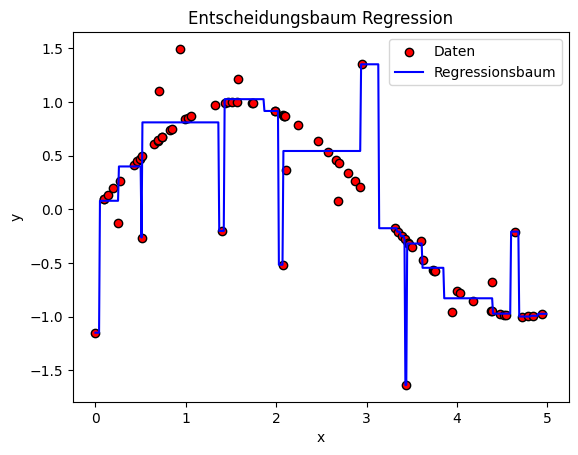

In [53]:

X_grid = np.arange(0, 5, 0.01)[:, np.newaxis] 
y_pred = tree_reg.predict(X_grid)  

# Visualisierung
plt.scatter(X_reg, y_reg, label="Daten", color="red", edgecolor="k")  # Originaldaten
plt.plot(X_grid, y_pred, label="Regressionsbaum", color="blue")  # Vorhersage
plt.xlabel("x")
plt.ylabel("y")
plt.title("Entscheidungsbaum Regression")
plt.legend()
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

